In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
import seaborn as sns

In [67]:
data = pd.read_csv("data/train.csv")

In [3]:
data.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [6]:
data.shape

(2952, 15)

In [4]:
data.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

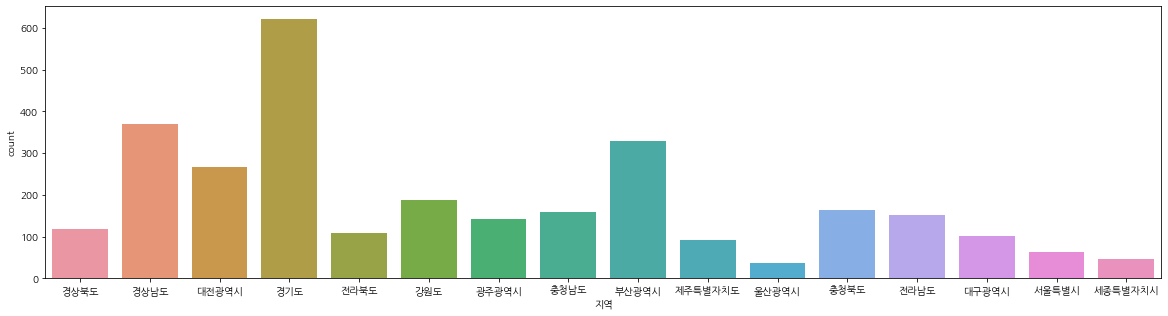

In [20]:
fig,ax = plt.subplots(figsize=(20,5))
sns.countplot(data['지역'])

In [22]:
data[data['임대보증금'].isna()==True]['공급유형'].unique()

array(['임대상가', '공공분양'], dtype=object)

In [54]:
data[data['임대보증금'].isna()==True].shape

(569, 15)

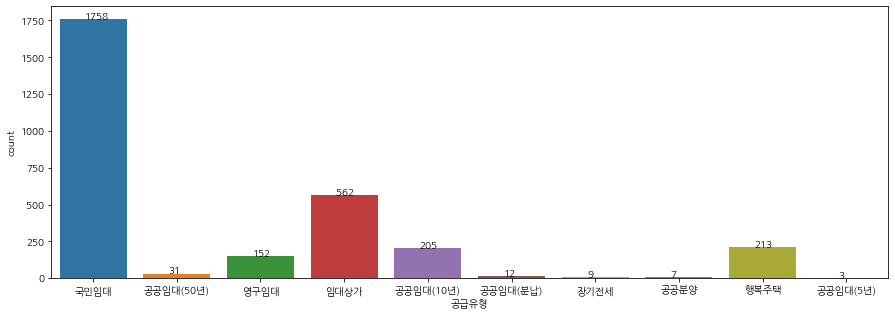

In [53]:
fig,ax = plt.subplots(figsize=(15,5))
sns.countplot(data['공급유형'])
for p in ax.patches:
    ax.annotate(s=p.get_height(),xy=(p.get_xy()[0]+0.3,p.get_height()))

- 임대상가, 공공분양은 모두 결측치를 가지고 있음

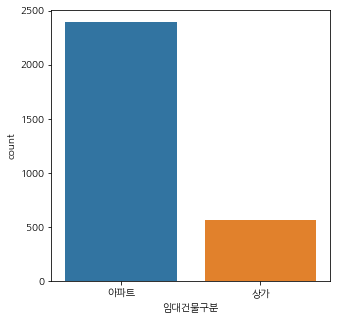

In [59]:
fig,ax = plt.subplots(figsize=(5,5))
sns.countplot(data['임대건물구분'])

In [61]:
data.corr()['등록차량수']

총세대수                            0.316703
전용면적                            0.115453
전용면적별세대수                        0.247085
공가수                             0.118121
도보 10분거리 내 지하철역 수(환승노선 수 반영)   -0.108592
도보 10분거리 내 버스정류장 수              0.103752
단지내주차면수                         0.859216
등록차량수                           1.000000
Name: 등록차량수, dtype: float64

- 등록차량수/단지내주차면수 비율을 y값으로 예측하는 것도 하나의 방법

In [62]:
tmp = data.copy()

In [63]:
tmp['newy'] = data['등록차량수']/data['단지내주차면수']

In [74]:
data[data['단지코드']=='C2627']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2492,C2627,580,아파트,전라남도,국민임대,26.79,138,18.0,A,5840000,89520,0.0,2.0,378.0,404.0
2493,C2627,580,아파트,전라남도,국민임대,26.79,12,18.0,A,5840000,89520,0.0,2.0,378.0,404.0
2494,C2627,580,아파트,전라남도,국민임대,36.92,138,18.0,A,8223000,136370,0.0,2.0,378.0,404.0
2495,C2627,580,아파트,전라남도,국민임대,46.96,172,18.0,A,17884000,175920,0.0,2.0,378.0,404.0
2496,C2627,580,아파트,전라남도,영구임대,24.95,96,18.0,I,7172000,68450,0.0,2.0,378.0,404.0
2497,C2627,580,아파트,전라남도,영구임대,24.95,24,18.0,I,7172000,68450,0.0,2.0,378.0,404.0


In [81]:
data[data['임대건물구분']=='상가']['도보 10분거리 내 지하철역 수(환승노선 수 반영)']

88     0.0
89     0.0
90     0.0
91     0.0
101    NaN
      ... 
834    0.0
835    0.0
836    0.0
837    0.0
838    0.0
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), Length: 562, dtype: float64

In [84]:
data[data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isna()==True]['지역'].unique()

array(['충청남도', '대전광역시', '경상남도'], dtype=object)

In [92]:
data.groupby('지역').mean()['도보 10분거리 내 지하철역 수(환승노선 수 반영)']

지역
강원도        0.000000
경기도        0.201288
경상남도       0.000000
경상북도       0.000000
광주광역시      0.000000
대구광역시      0.460784
대전광역시      0.722543
부산광역시      0.533537
서울특별시      0.187500
세종특별자치시    0.000000
울산광역시      0.000000
전라남도       0.000000
전라북도       0.000000
제주특별자치도    0.000000
충청남도       0.000000
충청북도       0.000000
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), dtype: float64